In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
df = pd.read_csv('dataset for  finding association rules.csv')

In [7]:
df.columns

Index(['shrimp', 'almonds', 'avocado', 'vegetables mix', 'green grapes',
       'whole weat flour', 'yams', 'cottage cheese', 'energy drink',
       'tomato juice', 'low fat yogurt', 'green tea', 'honey', 'salad',
       'mineral water', 'salmon', 'antioxydant juice', 'frozen smoothie',
       'spinach', 'olive oil'],
      dtype='object')

In [8]:
df1 = df.drop(['yams', 'cottage cheese', 'energy drink', 'tomato juice',
       'low fat yogurt', 'green tea', 'honey', 'salad', 'mineral water',
       'salmon', 'antioxydant juice', 'frozen smoothie', 'spinach',
       'olive oil'],axis = 1)

In [9]:
df1.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour
0,burgers,meatballs,eggs,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN


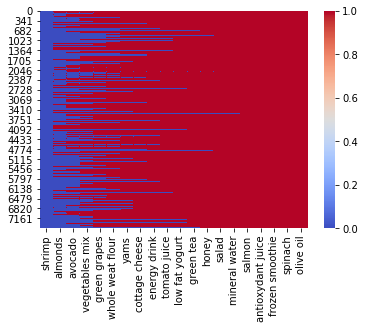

In [10]:
sns.heatmap(df.isnull(),cmap='coolwarm')

In [11]:
 df2 = df1[df1 >0]

In [13]:
df3 = df2.head(15)

In [14]:
dataframe = pd.DataFrame(df3)

In [15]:
dataframe.drop(['whole weat flour','green grapes','vegetables mix'],axis = 1)

,shrimp,almonds,avocado
0,burgers,meatballs,eggs
1,chutney,NaN,NaN
2,turkey,avocado,NaN
3,mineral water,milk,energy bar
4,low fat yogurt,NaN,NaN
5,whole wheat pasta,french fries,NaN
6,soup,light cream,shallot
7,frozen vegetables,spaghetti,green tea
8,french fries,NaN,NaN
9,eggs,pet food,NaN


In [16]:
df.shape

(7500, 20)

In [17]:
from apyori import apriori  

In [18]:
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
records = []  
for i in range(0, 7500):  
    records.append([str(df.values[i,j]) for j in range(0, 20)])

In [26]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)  
association_results = list(association_rules)  

In [42]:
print(association_results[0])

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)])


In [39]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: chicken -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: escalope -> mushroom cream sauce
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: pasta -> escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: herb & pepper -> ground beef
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: tomato sauce -> ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: shrimp -> pasta
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: chicken -> nan
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: shrimp -> chocolate
Support: 0.005333333333333333
Confidence: 0.23255813953488372
Lift: 3.26016083